## Задание 2

- решите задачу классификации на ваших данных с использованием рассмотренных моделей sklearn: knn, NB, Logistic Regression, SVM. Не забудьте подобрать гиперпараметры.
- вычислите значения метрик Accuracy, Precision, Recall, F1, ROC AUC score


# Импорт

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, RocCurveDisplay, auc

from joblib import dump


# Загружаем датасет и разбиваем её на выборку.

In [3]:
models = pd.read_csv('../../Data/DataLaba2/neo_task_moded_norm.csv')
X_train, X_test, y_train, y_test = train_test_split(models.drop('hazardous', axis=1), models['hazardous'], test_size=0.25, random_state=42)


# Подбираем гиппер-параметры.

In [3]:
logistic_regression_optimal_n_neighbors = RandomizedSearchCV(LogisticRegression(),
                                                             {'penalty': ['l1', 'l2', 'elasticnet', None],
                                                               'dual': [True, False],
                                                               'C': np.arange(0, 2, 0.1),
                                                               'tol': np.arange(0, 1e-4, 1e-5),
                                                               'l1_ratio': np.arange(0, 1, 0.1),
                                                               'warm_start': [True, False],
                                                               'multi_class': ['auto', 'ovr', 'multinomial'],
                                                               'solver': ['liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
                                                              },
                                                              n_iter=10,
                                                              n_jobs=-1,
                                                              scoring='accuracy',
                                                              random_state=71
                                                              ).fit(X_train, y_train)
logistic_regression_optimal_n_neighbors.best_params_

c:\Users\Mike\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Mike\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Mike\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\Mike\AppData\Local\Programs\Python\Pytho

{'warm_start': True,
 'tol': 1e-05,
 'solver': 'saga',
 'penalty': 'l1',
 'multi_class': 'multinomial',
 'l1_ratio': 0.8,
 'dual': False,
 'C': 1.5}

In [4]:
# logistic_regression_optimal_n_neighbors = GridSearchCV(LogisticRegression(), 
#                                                         {
#                                                         'penalty': ['l1', 'l2', 'elasticnet', None],
#                                                         #  'dual': [True, False],
#                                                         #  'l1_ratio': np.arange(0, 1, 0.1),
#                                                         'solver': ['liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
#                                                          }, 
#                                                          scoring=accuracy_score
#                                                          ).fit(X_train, y_train)
# logistic_regression_optimal_n_neighbors.best_params_

# Формула Байеса

In [5]:
lr = LogisticRegression(
    solver=logistic_regression_optimal_n_neighbors.best_params_['solver'] if 'solver' in logistic_regression_optimal_n_neighbors.best_params_ else 'lbfgs',
    penalty=logistic_regression_optimal_n_neighbors.best_params_['penalty'] if 'penalty' in logistic_regression_optimal_n_neighbors.best_params_ else 'l2',
    dual=logistic_regression_optimal_n_neighbors.best_params_['dual'] if 'dual' in logistic_regression_optimal_n_neighbors.best_params_ else False,
    tol=logistic_regression_optimal_n_neighbors.best_params_['tol'] if 'tol' in logistic_regression_optimal_n_neighbors.best_params_ else 1e-4,
    C=logistic_regression_optimal_n_neighbors.best_params_['C'] if 'C' in logistic_regression_optimal_n_neighbors.best_params_ else 1,
    multi_class=logistic_regression_optimal_n_neighbors.best_params_['multi_class'] if 'multi_class' in logistic_regression_optimal_n_neighbors.best_params_ else 'auto',
    warm_start=logistic_regression_optimal_n_neighbors.best_params_['warm_start'] if 'warm_start' in logistic_regression_optimal_n_neighbors.best_params_ else False,
)
lr.fit(X_train, y_train)
y_predicted_by_logistic_regression = lr.predict(X_test)

c:\Users\Mike\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


# Оценка качества 

In [6]:
print('Accuracy')
print(accuracy_score(y_test, y_predicted_by_logistic_regression))

Accuracy
0.9033863226033731


In [7]:
print('Confusion matrix')
print(confusion_matrix(y_test, y_predicted_by_logistic_regression))

Confusion matrix
[[20362   159]
 [ 2035   153]]


In [8]:
print('Precision, Recall, F\n', classification_report(y_test, y_predicted_by_logistic_regression))

Precision, Recall, F
               precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     20521
         1.0       0.49      0.07      0.12      2188

    accuracy                           0.90     22709
   macro avg       0.70      0.53      0.54     22709
weighted avg       0.87      0.90      0.87     22709



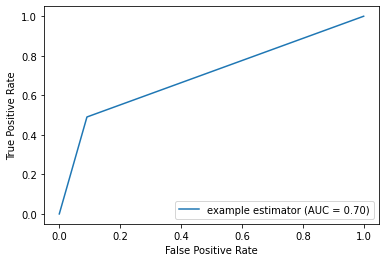

In [9]:
fpr, tpr, thresholds = roc_curve(y_predicted_by_logistic_regression, y_test)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()

In [11]:
dump(lr, '../../Pipelines/Laba2/lr.sav')

['../../Pipelines/lr.sav']